# BASALT 2022 ColorMap Smoothing

## Background
I am working on potential solutions for https://www.aicrowd.com/challenges/neurips-2022-minerl-basalt-competition. A notebook exploration at an attempt to smooth the ColorMap data collected.

## Data Mining
In order to get the data for this, I configured a Malmo agent to run around a random Malmo Gym environment while it collected both Image, Depth, and ColorMap data.

## Code

### Imports

In [9]:
import cv2
import numpy as np
import os
import pandas as pd
from tqdm.notebook import tqdm
from PIL import Image, ImageFilter

In [10]:
def SmoothImage(image):
    #https://stackoverflow.com/questions/56910774/how-to-filter-image-to-throw-away-stray-pixels
    # Load image 
    
    orig = image.copy()    # Save original

    # Threshold to make black and white
    thr = image.point(lambda p: p > 128 and 255)

    # Median filter to remove noise
    fil = thr.filter(ImageFilter.MedianFilter(3))

    return thr, fil

In [11]:
path = "/Volumes/Extreme SSD/Extra Datasets/video-depth-colormap/"
frames = {"RGB": [], "Depth": [], "ColorMap": []}
for run in os.listdir(path):
    if not 'csv' in run:
        newPath = path + run + "/"
        for index in range(0, len(os.listdir(newPath + "video_frames/"))):
            if os.path.exists(newPath + "video_frames/frame" + str(index) + ".png") and os.path.exists(newPath + "depth_frames/frame" + str(index) + ".png") and os.path.exists(newPath + "colormap_frames/frame" + str(index) + ".png"):
                frames['RGB'].append(newPath + "video_frames/frame" + str(index) + ".png")
                frames['Depth'].append(newPath + "depth_frames/frame" + str(index) + ".png")
                frames['ColorMap'].append(newPath + "colormap_frames/frame" + str(index) + ".png")
df = pd.DataFrame.from_dict(frames)

In [12]:
df.head()

,RGB,Depth,ColorMap
0,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...
1,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...
2,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...
3,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...
4,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...


10 4 3


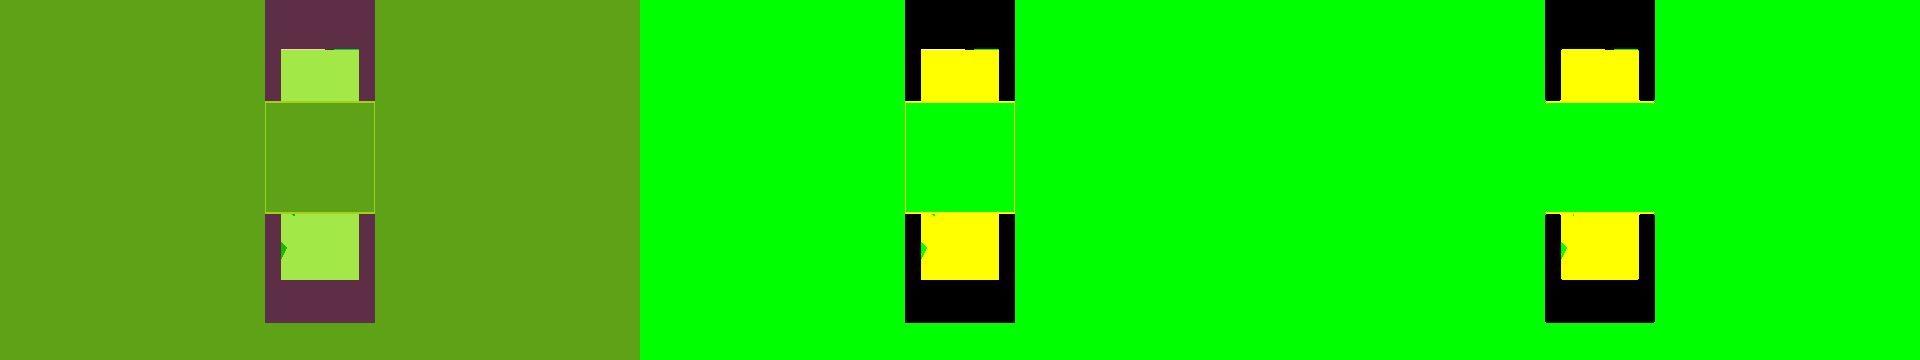

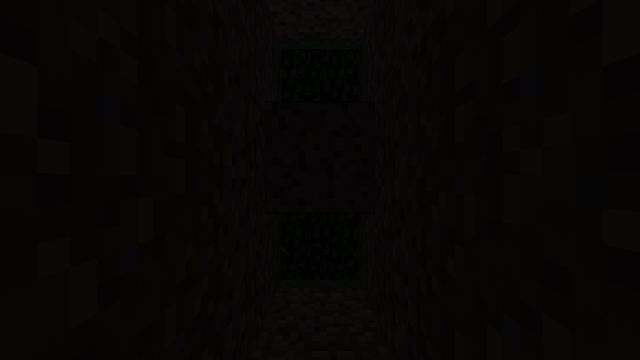

68 3 3


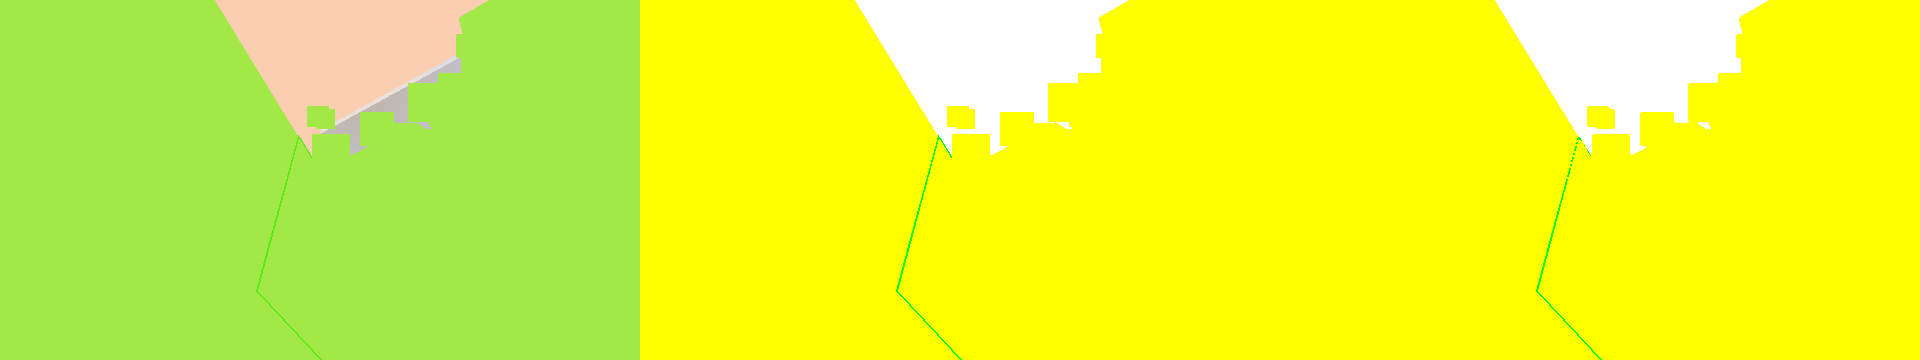

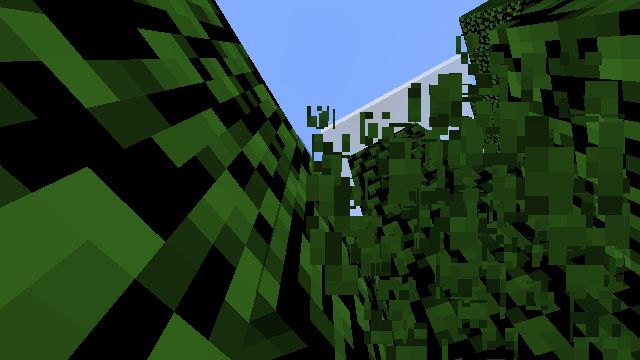

56 3 3


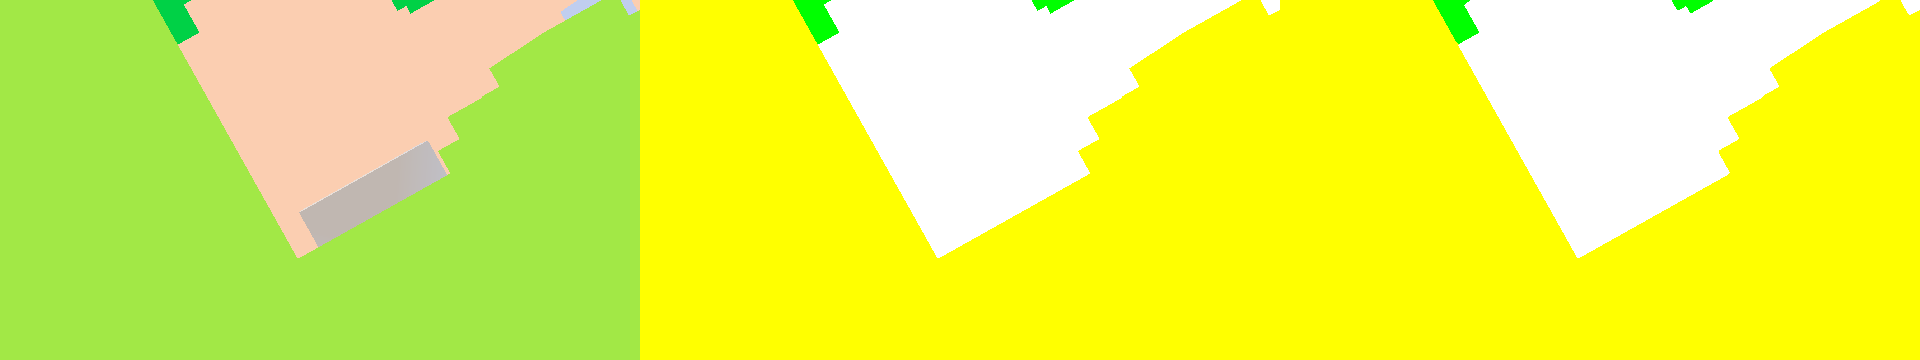

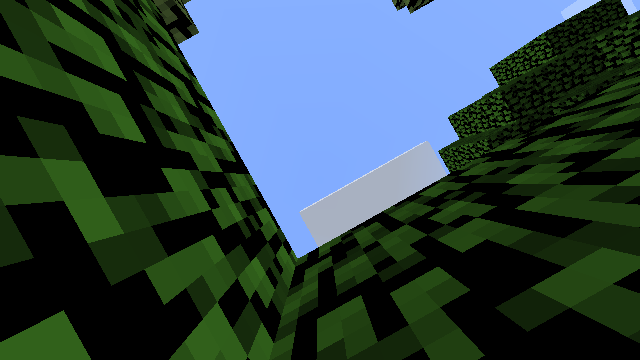

1 1 1


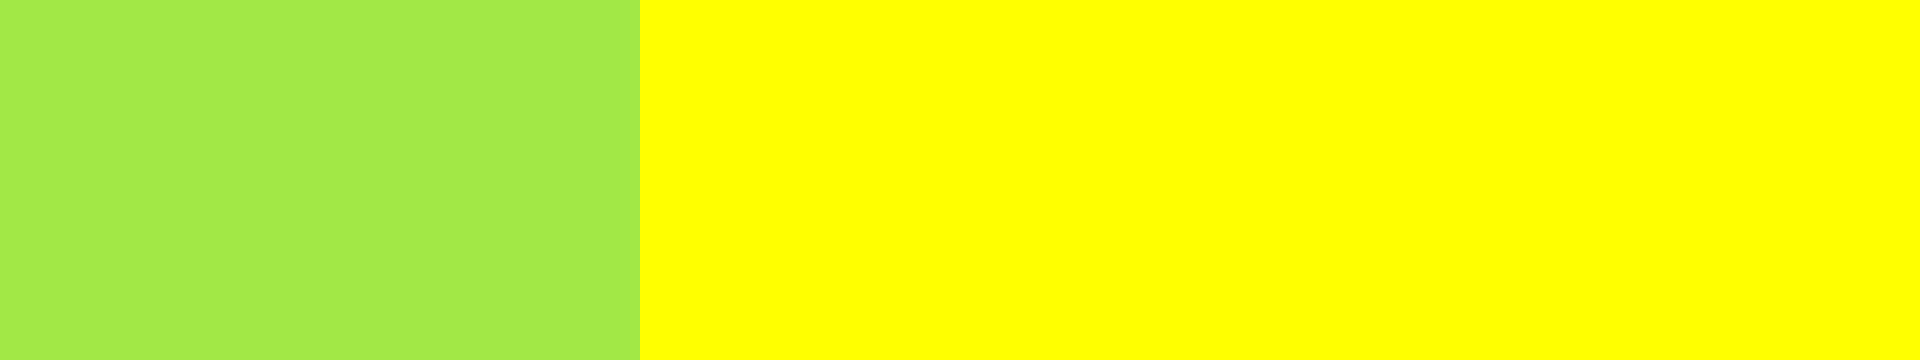

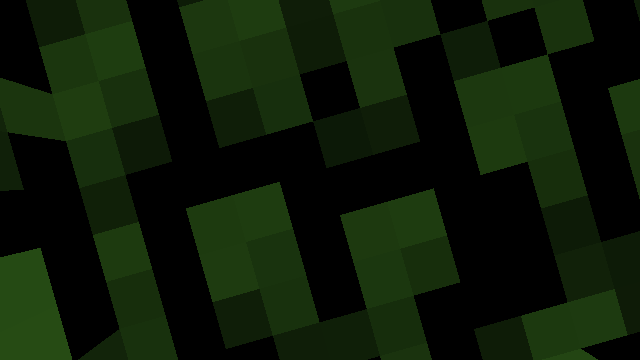

14 3 3


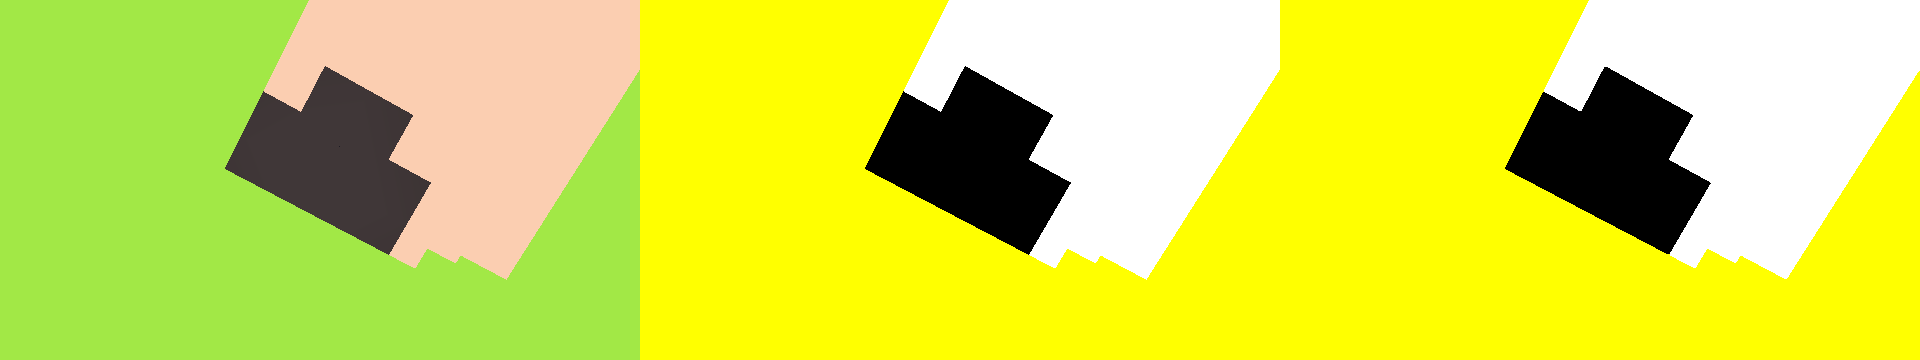

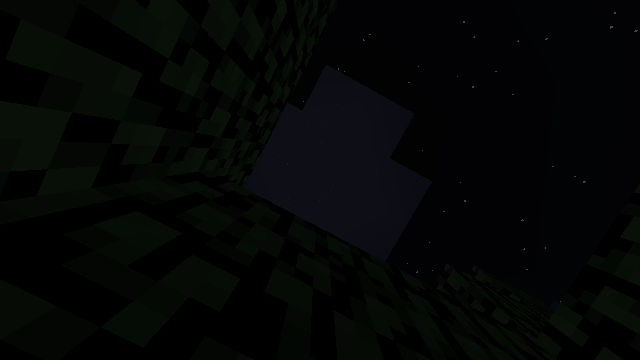

In [23]:
video_width = 640
video_height = 360
sample = df.sample(5)
for index, row in sample.iterrows():
    image = Image.open(row["ColorMap"])
    thr, fil = SmoothImage(image)
    new_image = Image.new('RGB',(3*video_width, video_height), (255,255,255))
    new_image.paste(image,(0,0))
    new_image.paste(thr,(video_width,0))
    new_image.paste(fil,(2*video_width,0))
    imgarr = np.asarray(image)
    thrarr = np.asarray(thr)
    filarr = np.asarray(fil)
    print(len(np.unique(imgarr.reshape(-1, imgarr.shape[2]), axis=0)),
          len(np.unique(thrarr.reshape(-1, imgarr.shape[2]), axis=0)),
          len(np.unique(filarr.reshape(-1, imgarr.shape[2]), axis=0)))
    display(new_image)
    display(Image.open(row["RGB"]))

### Conclusion
Not be great choice for this project, but the smoothing algorithm works.